<center><H1 style = "color: green">GERMAN CREDIT RISK ANALYSIS</H1> </center>

***

## Contents

German Credit Dataset
1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)


#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load 'german_credit_data.csv' and store it in a dataframe

In [2]:
df = pd.read_csv('german_credit_data.csv')
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


#### View top 5 rows

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


#### Do data analysis with the dataset ( shape of dataset,columns,null objects,unique elements)

#### Shape

In [4]:
df.shape

(1000, 11)

#### Columns

In [5]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

#### Number of null objects in each column

In [6]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

### Fill all null objects with 'Unknown'

In [7]:
df = df.fillna('Unknown')
df.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

#### Unique elements in each column

In [8]:
for col in df.columns:
    print(f"\'Unique elements in '{col}':")
    print(df[col].unique())

'Unique elements in 'Unnamed: 0':
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 

##### Create a New column Id by replacing unnamed column

In [9]:
df.rename(columns={'Unnamed: 0':'Id'},inplace = True)

In [10]:
df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,Unknown,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,Unknown,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


#### Find the information of the dataset


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


#### Find basic statistical information about the dataset

In [12]:
df.describe()

,Id,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [13]:
df.columns

Index(['Id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

#### Fetch the following groupby results

In [14]:
df.groupby(['Sex','Risk','Purpose'])['Id'].count()

Sex     Risk  Purpose            
female  bad   business                 7
              car                     40
              domestic appliances      2
              education                9
              furniture/equipment     28
              radio/TV                19
              repairs                  2
              vacation/others          2
        good  business                12
              car                     54
              domestic appliances      4
              education               15
              furniture/equipment     46
              radio/TV                66
              repairs                  3
              vacation/others          1
male    bad   business                27
              car                     66
              domestic appliances      2
              education               14
              furniture/equipment     30
              radio/TV                43
              repairs                  6
              vacation/

## <span style = "color: orange"> Data Visualization </span>

### Plot the graphs shown below

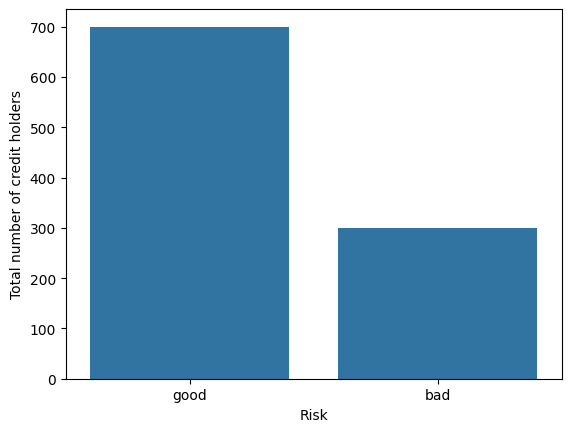

In [15]:
sns.countplot(x =  'Risk' , data = df )
plt.ylabel('Total number of credit holders')
plt.show()

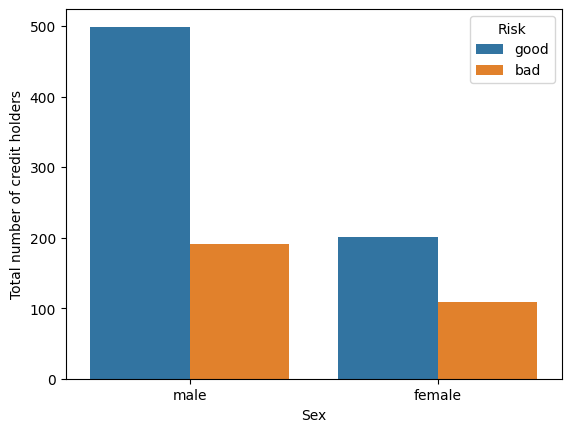

In [16]:
sns.countplot(x='Sex', hue = 'Risk', data = df)
plt.ylabel('Total number of credit holders')
plt.legend(title = 'Risk')
plt.show()

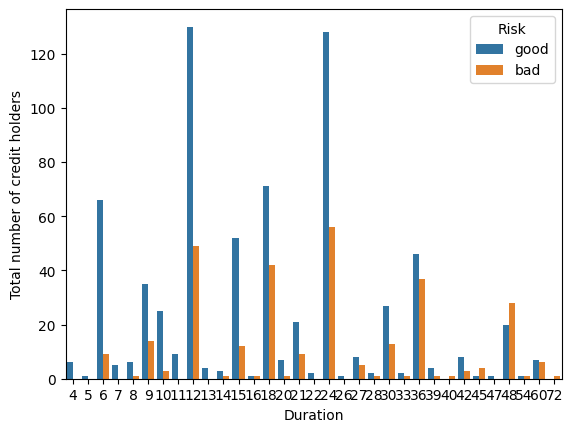

In [17]:
sns.countplot(x = 'Duration',hue = 'Risk',data = df)
plt.ylabel('Total number of credit holders')
plt.show()

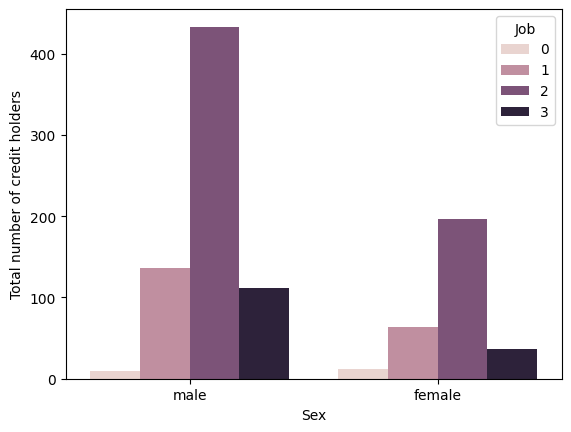

In [18]:
sns.countplot(x = 'Sex',hue = 'Job',data = df)
plt.ylabel('Total number of credit holders')
plt.show()

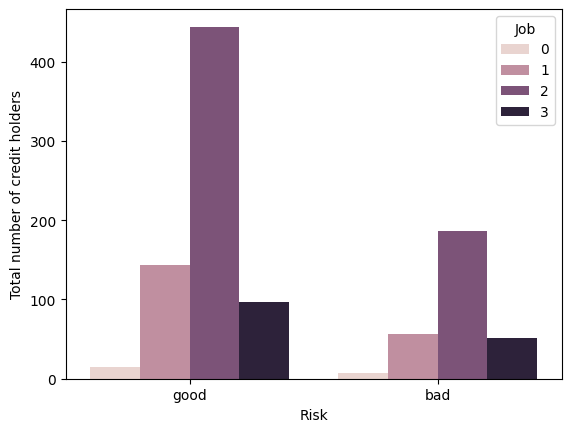

In [19]:
sns.countplot(x = 'Risk',hue = 'Job',data = df)
plt.ylabel('Total number of credit holders')
plt.show()

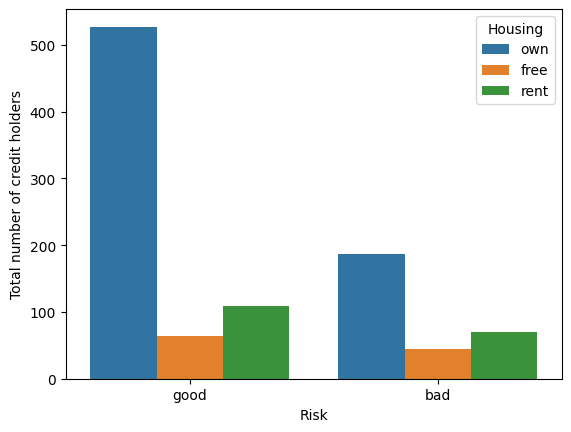

In [20]:
sns.countplot(x = 'Risk',hue = 'Housing',data = df)
plt.ylabel('Total number of credit holders')
plt.show()

In [21]:
df['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

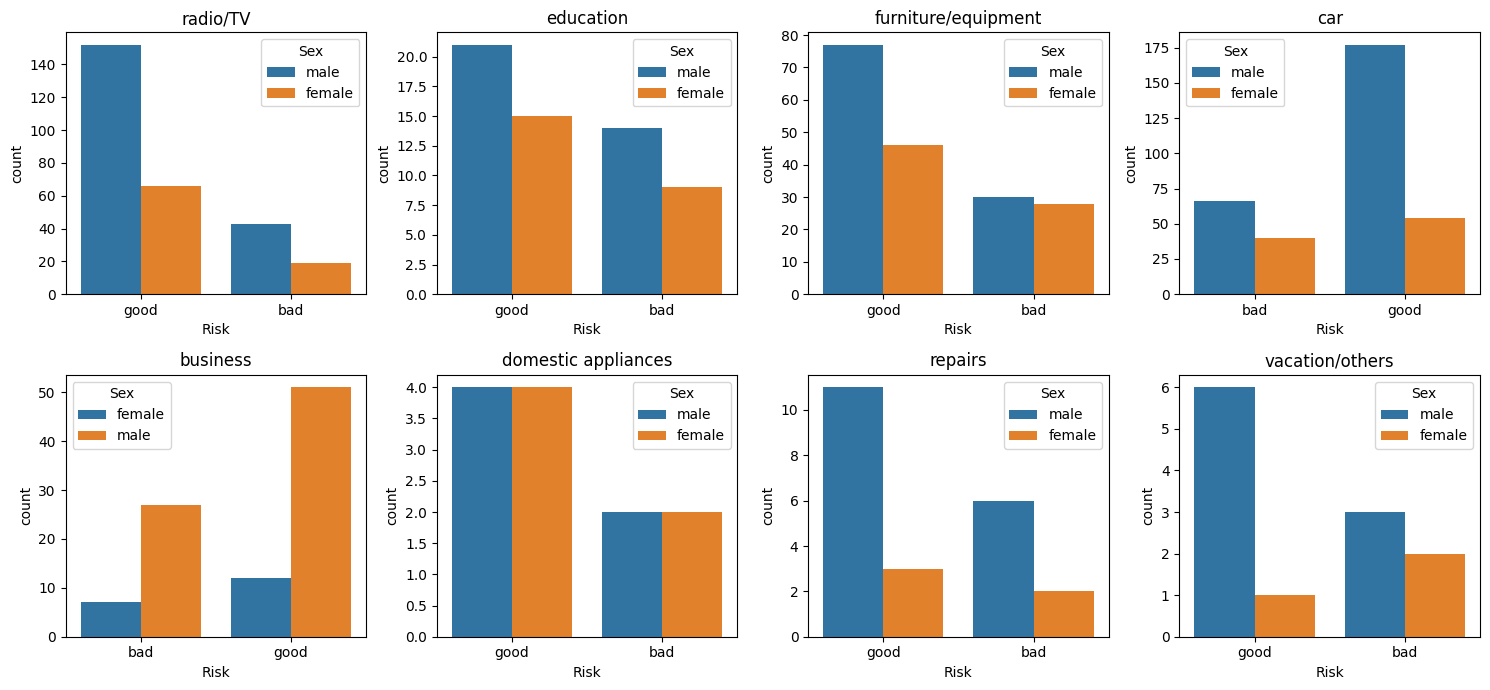

In [22]:
fig ,axes = plt.subplots(2,4,figsize = (15,7))
row,column = 0,0 
for item in df['Purpose'].unique():
    sns.countplot(data =df[df['Purpose'] == item], x = 'Risk', hue = 'Sex', ax = axes[row, column])
    axes[row,column].set_title(item)
    column += 1
    if column == 4:
        column = 0
        row += 1
plt.tight_layout()
plt.show()

In [23]:
df['Job'].unique()

array([2, 1, 3, 0])

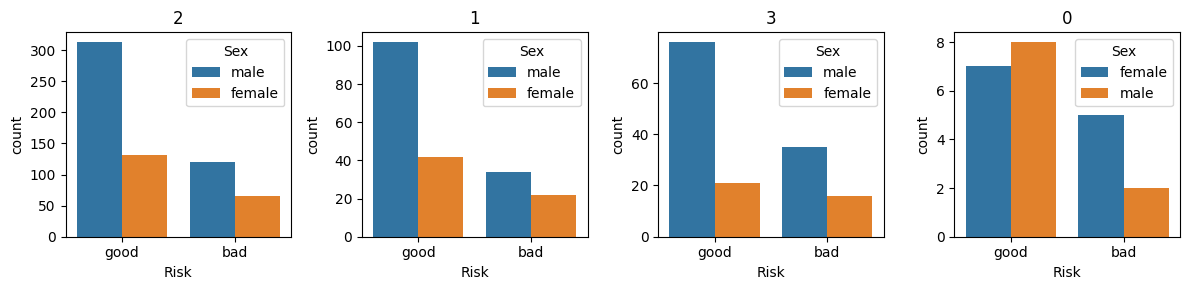

In [24]:
fig ,axes = plt.subplots(1,4,figsize = (12,3))
column = 0 
for item in df['Job'].unique():
    sns.countplot(data =df[df['Job'] == item], x = 'Risk', hue = 'Sex', ax = axes[column])
    axes[column].set_title(item)
    column += 1
    
plt.tight_layout()
plt.show()

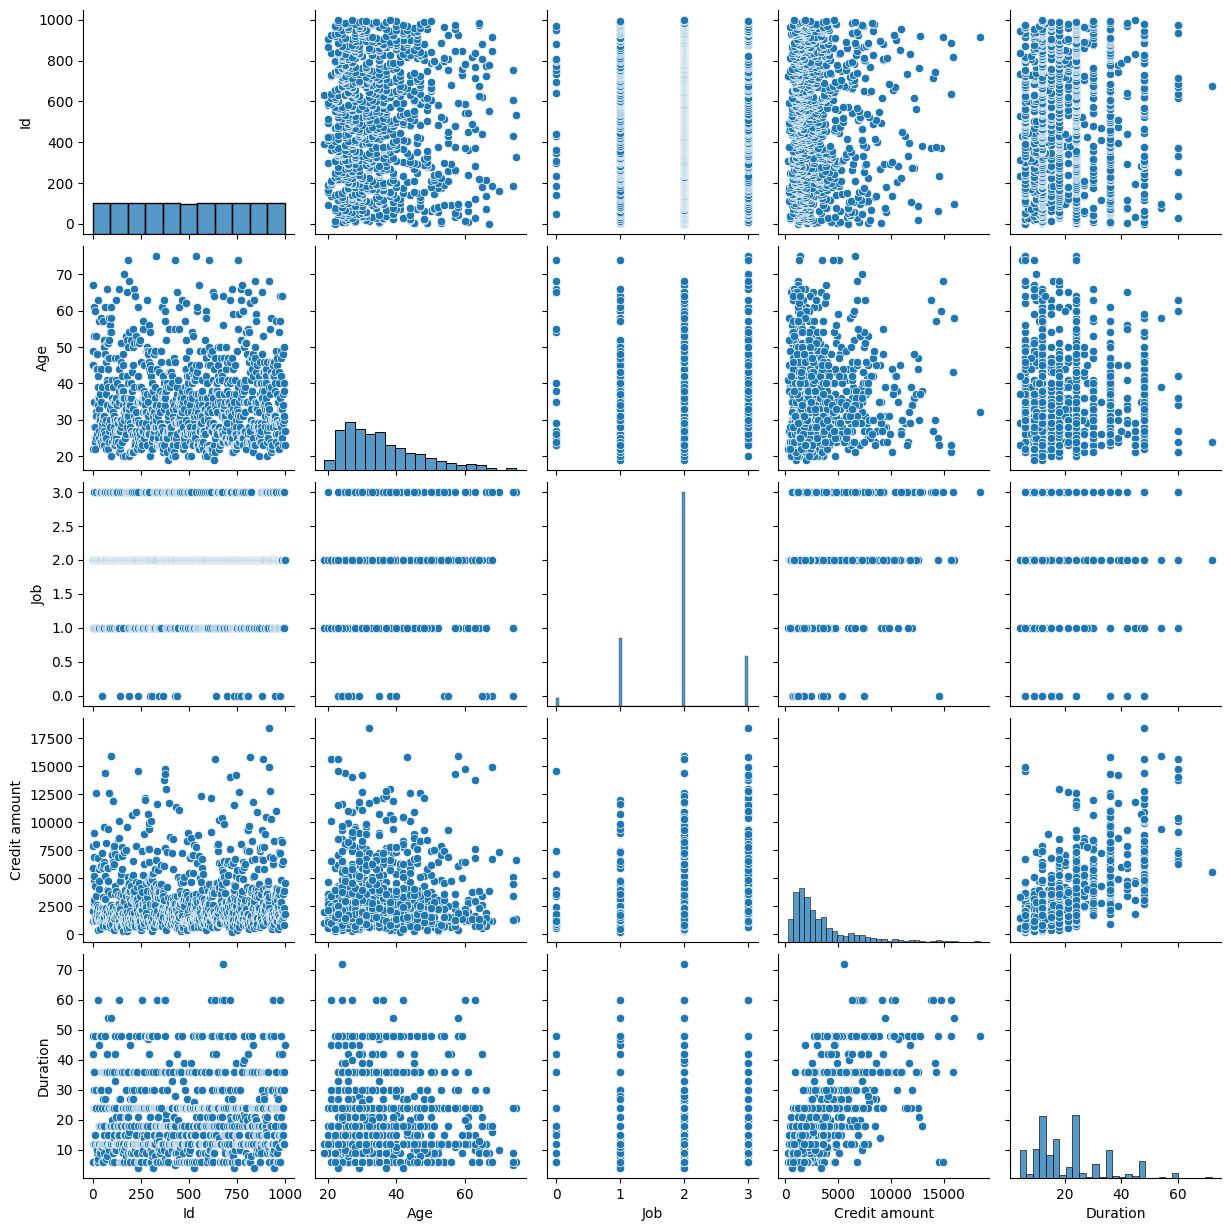

In [25]:
sns.pairplot(df)
plt.show()

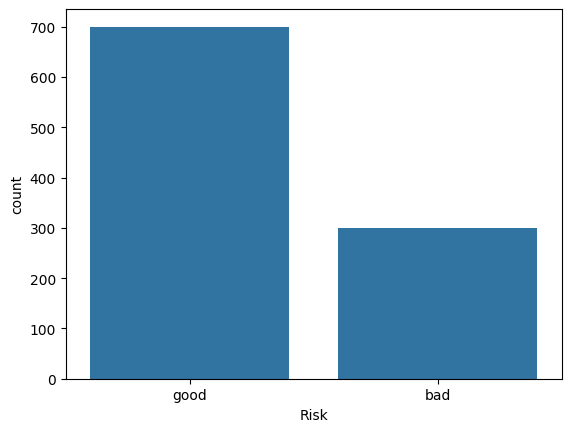

In [26]:
sns.countplot(x = 'Risk', data = df)
plt.show()

# Preprocess the dataset:
**We have to convert all categorical values into numerical values.**

#### Convert purpose column using Dummy variables

In [27]:
df = pd.get_dummies(df,columns=['Purpose'],prefix='',prefix_sep='',dtype =int)
df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,0,67,male,2,own,Unknown,little,1169,6,good,0,0,0,0,0,1,0,0
1,1,22,female,2,own,little,moderate,5951,48,bad,0,0,0,0,0,1,0,0
2,2,49,male,1,own,little,Unknown,2096,12,good,0,0,0,1,0,0,0,0
3,3,45,male,2,free,little,little,7882,42,good,0,0,0,0,1,0,0,0
4,4,53,male,2,free,little,little,4870,24,bad,0,1,0,0,0,0,0,0


#### Use label encoding for rest of the categorical data

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



In [29]:

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Risk'], dtype='object')

In [30]:
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [31]:
df.head(1)

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,0,67,1,2,1,0,1,1169,6,1,0,0,0,0,0,1,0,0


### Check the unique values in the new dataframe

In [32]:
for col in df.columns:
    print(f"\'Unique elements in '{col}':")
    print(df[col].unique())

'Unique elements in 'Id':
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 

In [33]:
corr = df .corr()

### Plot heatmap

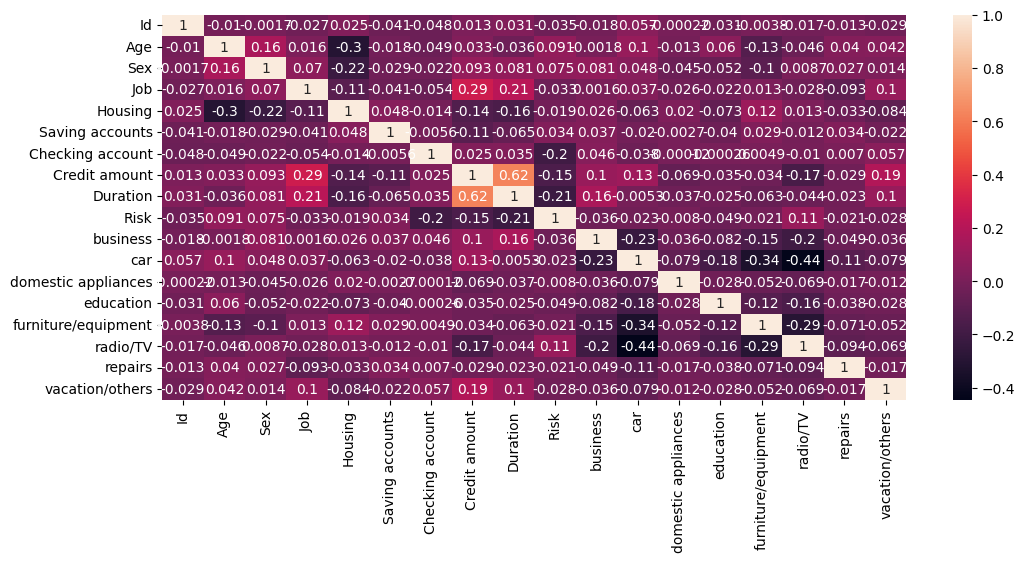

In [34]:
plt.figure(figsize = (12,5))
sns.heatmap(corr, annot = True    )
plt.show()

## Select the Dependent(target) and Independent Variables:

In [35]:
X = df.drop(columns=['Risk'])
y = df['Risk']

# Standardize the data

In [76]:

from sklearn.preprocessing import StandardScaler


In [77]:
scaler = StandardScaler()

In [78]:
 xcolumns = X.columns

In [79]:
X = scaler.fit_transform(X)

In [80]:
X = pd.DataFrame(X,columns = xcolumns)

In [81]:
X.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,-1.730320,2.766456,0.670280,0.146949,-0.133710,-1.231393,-0.001045,-0.745131,-1.236478,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
1,-1.726856,-1.191404,-1.491914,0.146949,-0.133710,-0.196609,1.044372,0.949817,2.248194,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
2,-1.723391,1.183312,0.670280,-1.383771,-0.133710,-0.196609,-1.046463,-0.416562,-0.738668,-0.327749,-0.712949,-0.110208,3.993639,-0.470108,-0.623610,-0.149983,-0.110208
3,-1.719927,0.831502,0.670280,0.146949,-2.016956,-0.196609,-0.001045,1.634247,1.750384,-0.327749,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208
4,-1.716463,1.535122,0.670280,0.146949,-2.016956,-0.196609,-0.001045,0.566664,0.256953,-0.327749,1.402626,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208


# Split the data into training and testing set

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state= 100)

# Models:

## Random Forest Classifier.
** Let's choose the best estimator and parameters :GridSearchCV**

In [83]:
#let's check what params will be best suitable for random forest classification.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [84]:
 model = RandomForestClassifier()

In [85]:
forest_params = {'max_depth': [3,5,10,15],'max_features':['auto', 'sqrt',0.5]}
clf = GridSearchCV(model,forest_params,cv = 10, scoring='accuracy')

import warnings
warnings.filterwarnings('ignore')

In [86]:
clf .fit(X_train,y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [3, 5, ...], 'max_features': ['auto', 'sqrt', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [87]:
rf_pred = clf.predict(X_test)

### Check the accuracy score, Confusion metrics, Classification report and Cross val score

In [88]:
print('Accuracy Score',metrics.accuracy_score(y_test,rf_pred))
print('Confusion Matrix',metrics.confusion_matrix(y_test,rf_pred))
print('Classification Report',metrics.classification_report(y_test,rf_pred))
cv_scores = cross_val_score(clf,X,y, cv = 5)

print( "Average CV Accuracy:", cv_scores.mean())

Accuracy Score 0.7233333333333334
Confusion Matrix [[ 30  51]
 [ 32 187]]
Classification Report               precision    recall  f1-score   support

           0       0.48      0.37      0.42        81
           1       0.79      0.85      0.82       219

    accuracy                           0.72       300
   macro avg       0.63      0.61      0.62       300
weighted avg       0.70      0.72      0.71       300

Average CV Accuracy: 0.7389999999999999


#### Visualize the confusion matrix

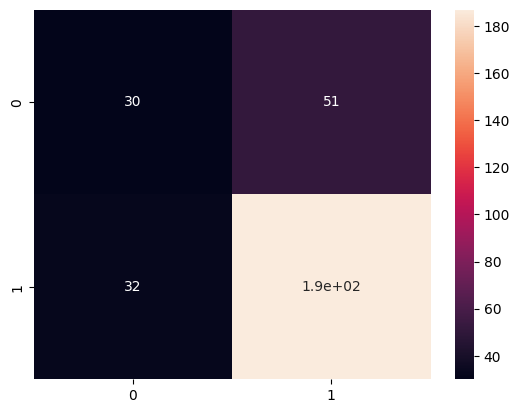

In [89]:
sns.heatmap(metrics.confusion_matrix(y_test,rf_pred),annot = True)
plt.show()

## SupportVectorClassifier:

In [90]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score


In [91]:
svc = SVC()

In [92]:
param_grid = {'C': [0.75,0.85,0.95,1],'degree': [3,4,5],
             'kernel':['linear','poly','rbf','sigmoid']}

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, 
                           scoring='accuracy', cv=5 )

grid_search.fit(X_train,y_train)

,estimator,SVC()
,param_grid,"{'C': [0.75, 0.85, ...], 'degree': [3, 4, ...], 'kernel': ['linear', 'poly', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.95


## Check the accuracy score, Confusion metrics, Classification report and Cross val score


In [93]:
svc_pred = grid_search.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(y_test,svc_pred))
print('Classification Matrix:',classification_report(y_test,svc_pred))
cv_scores = cross_val_score(grid_search,X,y,cv = 5)
print('Cross Validation Score:',cv_scores.mean())

Accuracy Score: 0.7166666666666667
Confusion Matrix: [[  9  72]
 [ 13 206]]
Classification Matrix:               precision    recall  f1-score   support

           0       0.41      0.11      0.17        81
           1       0.74      0.94      0.83       219

    accuracy                           0.72       300
   macro avg       0.58      0.53      0.50       300
weighted avg       0.65      0.72      0.65       300

Cross Validation Score: 0.701


## LogisticRegression

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score




In [95]:
log_reg = LogisticRegression()

In [96]:
log_reg.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [97]:
log_pred = log_reg.predict(X_test)

In [98]:
print('Accuracy Score:',accuracy_score(y_test,log_pred))
print('Confusion Matrix:',confusion_matrix(y_test,log_pred))
print('Classification Matrix:',classification_report(y_test,log_pred))
cv_scores = cross_val_score(log_reg,X,y,cv = 5)
print('Cross Validation Score:',cv_scores.mean())

Accuracy Score: 0.7
Confusion Matrix: [[ 11  70]
 [ 20 199]]
Classification Matrix:               precision    recall  f1-score   support

           0       0.35      0.14      0.20        81
           1       0.74      0.91      0.82       219

    accuracy                           0.70       300
   macro avg       0.55      0.52      0.51       300
weighted avg       0.64      0.70      0.65       300

Cross Validation Score: 0.6990000000000001


## AdaBoost: Classifier

In [99]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score




In [100]:
model = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth= 1),n_estimators=50,learning_rate=1.0,random_state=42)
model.fit(X_train,y_train)

,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [101]:
Ada_pred = model.predict(X_test)

In [102]:
print('Accuracy Score:',accuracy_score(y_test,Ada_pred))
print('Confusion Matrix:',confusion_matrix(y_test,Ada_pred))
print('Classification Matrix:',classification_report(y_test,Ada_pred))
cv_scores = cross_val_score(model,X,y,cv = 5)
print('Cross Validation Score:',cv_scores.mean())

Accuracy Score: 0.7533333333333333
Confusion Matrix: [[ 32  49]
 [ 25 194]]
Classification Matrix:               precision    recall  f1-score   support

           0       0.56      0.40      0.46        81
           1       0.80      0.89      0.84       219

    accuracy                           0.75       300
   macro avg       0.68      0.64      0.65       300
weighted avg       0.73      0.75      0.74       300

Cross Validation Score: 0.712


#### View scores of the different models 

In [103]:
models = {
    'Random Forest Classifier':accuracy_score(y_test,rf_pred),
    'Logistic Regression': accuracy_score(y_test,log_pred),
    'Gradient Boost Classifier':accuracy_score(y_test,Ada_pred),
    'Support Vector Machine': accuracy_score(y_test,svc_pred),



}

result = pd.DataFrame(models.items(),columns=['Model','Accuracy'])
result


,Model,Accuracy
0,Random Forest Classifier,0.723333
1,Logistic Regression,0.700000
2,Gradient Boost Classifier,0.753333
3,Support Vector Machine,0.716667


## ANALYZING THE RESULTS

**So now we have to decide which one is the best model, and we have two types of wrong values:**

* False Positive, means they won't pay the loan(Risk:Yes), but the model thinks they will.
* False Negative, means they will pay the loan(Risk:No), but the model said they won't.

**In my opinion:**

* Length of the dataset isn't enough, we need more data for better accuracy.

## PCA to Speed up Machine Learning Algorithms (Logistic Regression)
Step 0: Import and use PCA. After PCA you will apply a machine learning algorithm of your choice to the transformed data

In [104]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


In [105]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [106]:
model = LogisticRegression()
model.fit(X_pca,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [107]:
pca.n_components_

17

In [108]:
#Apply the mapping (transform) to both the training set and the test set.
train_X = pca.transform(X_train)
test_X = pca.transform(X_test)

**Step 1: Import the model you want to use**

In sklearn, all machine learning models are implemented as Python classes

In [109]:
from sklearn.linear_model import LogisticRegression


**Step 2: Make an instance of the Model**

In [110]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
# solver = 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [111]:
logisticRegr.fit(train_X,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [121]:
pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(pca, open("pca.pkl", "wb"))
pickle.dump(model, open("credit_risk_app.pkl", "wb"))

print("Model + PCA + Scaler saved!")

Model + PCA + Scaler saved!


In [122]:
y_pred =  logisticRegr.predict(test_X)

In [123]:
accuracy_score(y_test,y_pred)

0.7

In [124]:
#Confusion Matrix
from sklearn import metrics
confusion_matrix(y_test,y_pred)

array([[ 11,  70],
       [ 20, 199]])

In [125]:
cv_scores = cross_val_score(logisticRegr,X_pca,y,cv=5)
cv_scores.mean()

np.float64(0.6990000000000001)

## Model Deployment With Tkinter

### Import Tkinter Library

### Define a function that will return the output of our prediction in an Entry box in tkinter window

### Create Tkinter window and all necessary input and output boxes

***

# <span style = "color:coral"> Great Job!  You Have Succesfully deployed your ML Model</span>